# **Lab Exercises 0– Fundamentals of Signal Processing**

Objective: To have basic knowledge of signals and understand the libraries for signal processing .


Shivam Bomble 2448510

# 1.Objective:

To study and understand the characteristics of common discrete-time and continuous-time signals including unit step, unit impulse, ramp, exponential, and sinusoidal signals.

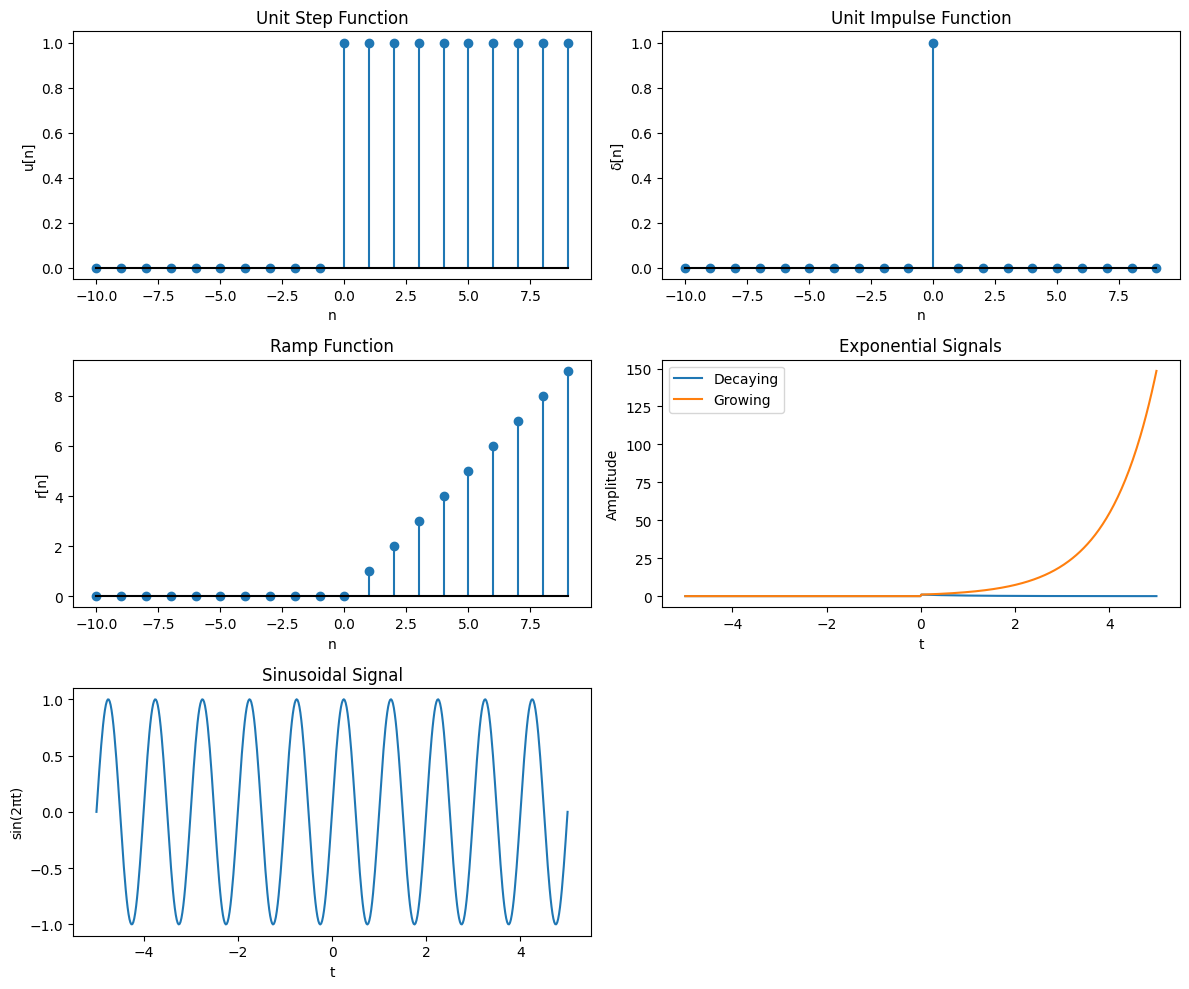

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.arange(-10, 10, 1)   # discrete time steps
t_cont = np.linspace(-5, 5, 500)  # continuous-like for smooth plots

# (a) Unit Step Function
u = np.array([1 if i >= 0 else 0 for i in t])

# (b) Unit Impulse Function (delta)
delta = np.array([1 if i == 0 else 0 for i in t])

# (c) Ramp Function
ramp = np.array([i if i >= 0 else 0 for i in t])

# (d) Exponential Signal (decaying and growing)
exp_decay = np.exp(-t_cont) * (t_cont >= 0)   # decaying for t >= 0
exp_grow = np.exp(t_cont) * (t_cont >= 0)     # growing for t >= 0

# (e) Sinusoidal Signal
sin_wave = np.sin(2 * np.pi * 1 * t_cont)   # frequency = 1 Hz

# ================= Plotting =================
plt.figure(figsize=(12, 10))

# Unit Step
plt.subplot(3, 2, 1)
plt.stem(t, u, basefmt="k")
plt.title("Unit Step Function")
plt.xlabel("n"); plt.ylabel("u[n]")

# Unit Impulse
plt.subplot(3, 2, 2)
plt.stem(t, delta, basefmt="k")
plt.title("Unit Impulse Function")
plt.xlabel("n"); plt.ylabel("δ[n]")

# Ramp
plt.subplot(3, 2, 3)
plt.stem(t, ramp, basefmt="k")
plt.title("Ramp Function")
plt.xlabel("n"); plt.ylabel("r[n]")

# Exponential (Decay & Growth)
plt.subplot(3, 2, 4)
plt.plot(t_cont, exp_decay, label="Decaying")
plt.plot(t_cont, exp_grow, label="Growing")
plt.title("Exponential Signals")
plt.xlabel("t"); plt.ylabel("Amplitude")
plt.legend()

# Sinusoidal
plt.subplot(3, 2, 5)
plt.plot(t_cont, sin_wave)
plt.title("Sinusoidal Signal")
plt.xlabel("t"); plt.ylabel("sin(2πt)")

plt.tight_layout()
plt.show()

Results:

Unit Step Function (
𝑢
[
𝑛
]
u[n]): The signal is 0 for all negative values of
𝑛
n and 1 for
𝑛
≥
0
n≥0. A clear step occurs at
𝑛
=
0
n=0.

Unit Impulse Function (
𝛿
[
𝑛
]
δ[n]): The signal is zero everywhere except at
𝑛
=
0
n=0, where it has a value of 1. This appears as a single spike at the origin.

Ramp Function (
𝑟
[
𝑛
]
r[n]): The signal increases linearly starting from 0. Observed values are 0, 1, 2, 3, … demonstrating a constant slope.

Exponential Signals:

Decaying exponential decreases gradually towards 0 as time increases.

Growing exponential increases rapidly as time increases, showing exponential growth behavior.

Sinusoidal Signal: The signal oscillates smoothly between -1 and 1. It exhibits periodic behavior with a constant amplitude and frequency.

# 2.Objective:

To observe the effects of different sampling rates on the reconstruction of a sinusoidal signal and demonstrate the Nyquist theorem and aliasing phenomenon.

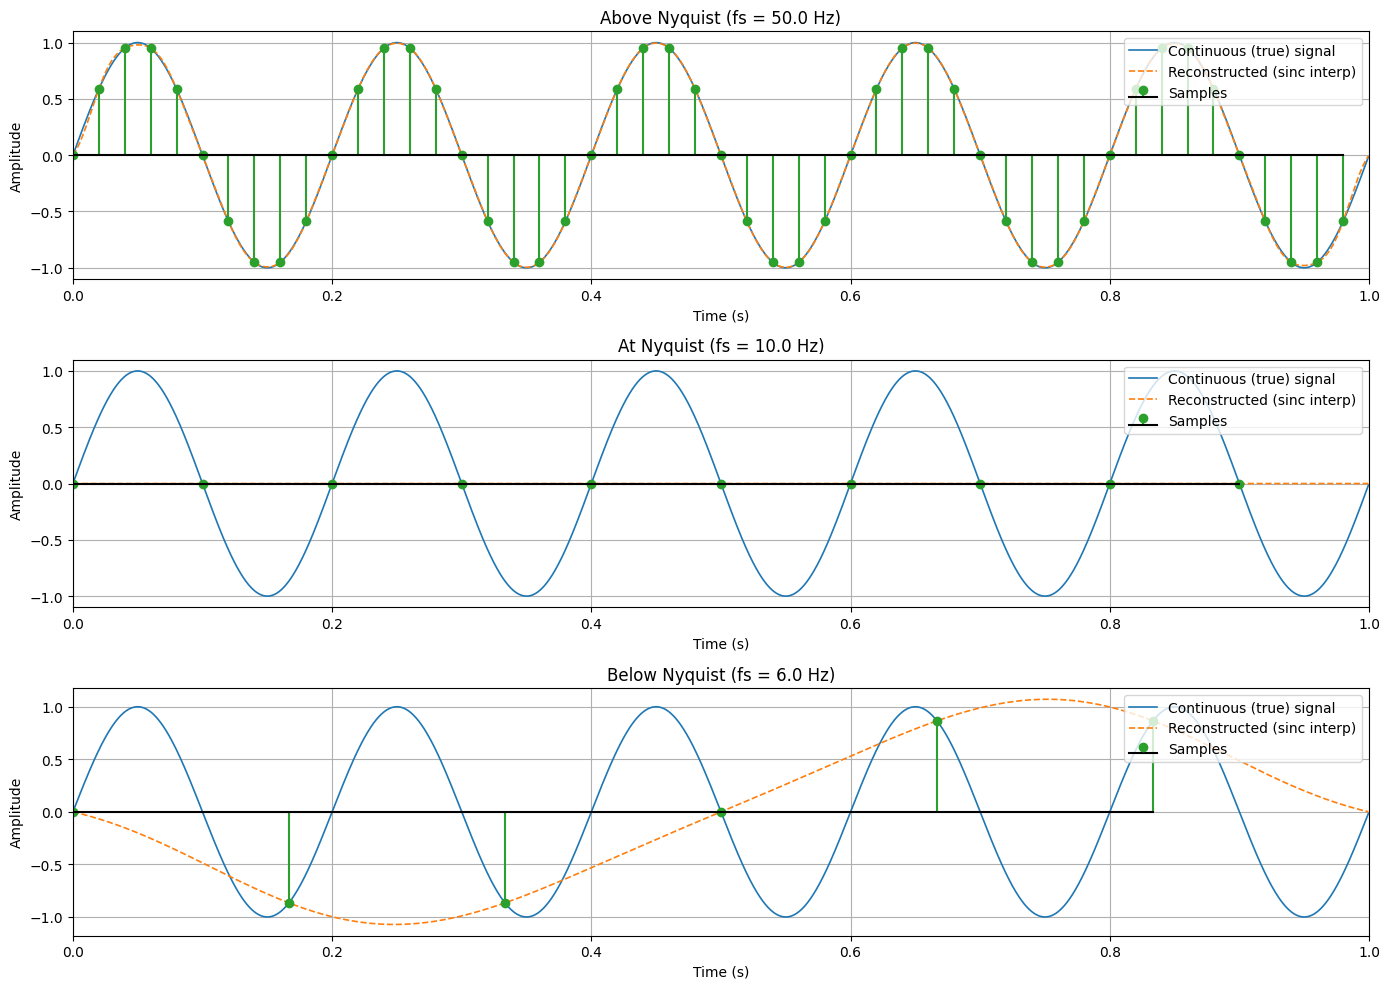

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Parameters (change if needed)
# -------------------------
f0 = 5.0                # signal frequency in Hz (continuous sinusoid)
A = 1.0                 # amplitude
phi = 0.0               # phase (radians)

# high-resolution "continuous" time for plotting
fs_cont = 2000.0        # very high sampling rate to represent continuous signal
t_cont = np.arange(0, 1.0, 1.0/fs_cont)  # 1 second duration

# sampling rates to compare
fs_above = 50.0         # well above Nyquist (>> 2*f0)
fs_nyquist = 2.0 * f0   # Nyquist rate
fs_below = 6.0          # below Nyquist (example) -> aliasing expected since < 2*f0 (10 Hz)

sampling_rates = [
    ("Above Nyquist (fs = {:.1f} Hz)".format(fs_above), fs_above),
    ("At Nyquist (fs = {:.1f} Hz)".format(fs_nyquist), fs_nyquist),
    ("Below Nyquist (fs = {:.1f} Hz)".format(fs_below), fs_below),
]

# continuous (reference) signal
x_cont = A * np.sin(2 * np.pi * f0 * t_cont + phi)

# Ideal sinc reconstruction function
def sinc_reconstruct(t_eval, sample_times, samples, fs):
    """
    Reconstruct signal at times t_eval from discrete samples using ideal sinc interpolation.
    t_eval : array of times where reconstruction is evaluated
    sample_times : times of samples (nT)
    samples : sampled values x[n]
    fs : sampling frequency (Hz)
    """
    # Use np.sinc which implements sin(pi*x)/(pi*x)
    # interpolation kernel for each sample: sinc( (t - nT)/T ) = sinc(fs * (t - n/fs))
    T = 1.0 / fs
    # vectorized computation: for each t_eval compute sum_n samples[n] * sinc( fs*(t_eval - sample_times[n]) )
    # Be mindful of memory: create (len(t_eval), len(samples)) matrix
    # If signals are long, use chunking. For our 1-second demo it's fine.
    tau = t_eval[:, None] - sample_times[None, :]          # shape (len(t_eval), len(samples))
    sinc_args = fs * tau                                   # argument for np.sinc
    return np.dot(np.sinc(sinc_args), samples)             # result shape (len(t_eval),)

# -------------------------
# Plotting
# -------------------------
plt.figure(figsize=(14, 10))
for i, (title, fs) in enumerate(sampling_rates, start=1):
    # sampling instants (1 second duration)
    T = 1.0 / fs
    n = np.arange(0, int(np.floor(1.0 * fs)))   # sample indices for 0 <= t < 1.0
    t_samp = n * T
    x_samp = A * np.sin(2 * np.pi * f0 * t_samp + phi)

    # reconstruct on dense time axis using sinc interpolation
    x_rec = sinc_reconstruct(t_cont, t_samp, x_samp, fs)

    # Plot
    ax = plt.subplot(3, 1, i)
    ax.plot(t_cont, x_cont, label="Continuous (true) signal", linewidth=1.2)
    ax.plot(t_cont, x_rec, '--', label="Reconstructed (sinc interp)", linewidth=1.2)
    ax.stem(t_samp, x_samp, linefmt='C2-', markerfmt='C2o', basefmt='k', label="Samples")
    ax.set_title(title)
    ax.set_xlim(0, 1.0)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Nyquist Theorem: To avoid aliasing, the sampling frequency must satisfy
𝑓
𝑠
≥
2
𝑓
max
f
s
	​

≥2f
max
	​

.

Above Nyquist Rate: Perfect signal reconstruction is possible.

At Nyquist Rate: Reconstruction is theoretically possible but practically sensitive.

Below Nyquist Rate: Aliasing occurs; the signal appears distorted with false frequencies.

# 3.Objective

To generate and analyze a sinusoidal signal in both continuous and discrete-time forms, and to verify its amplitude, frequency, and periodicity.

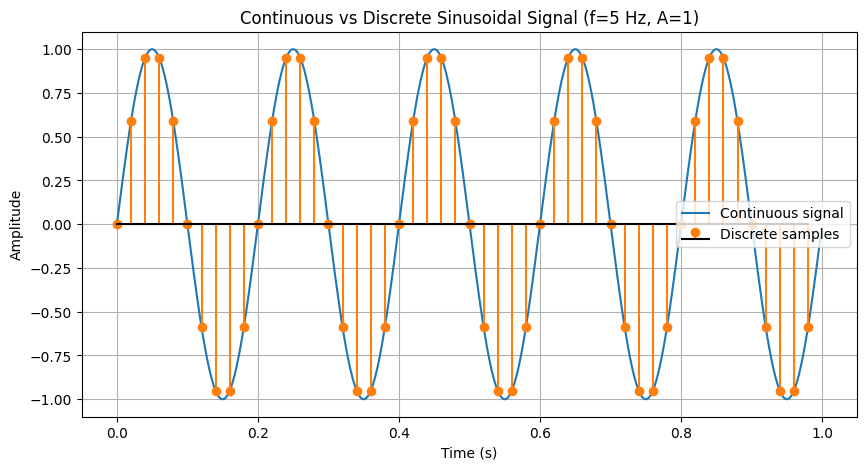

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0           # amplitude
f = 5.0           # frequency (Hz)
duration = 1.0    # seconds

# Continuous signal (high resolution)
fs_cont = 1000.0  # high sampling rate to approximate continuous signal
t_cont = np.arange(0, duration, 1/fs_cont)
x_cont = A * np.sin(2 * np.pi * f * t_cont)

# Discrete signal (choose practical sampling rate)
fs_disc = 50.0  # discrete sampling rate (must be > 2*f = 10 Hz, so 50 Hz is safe)
t_disc = np.arange(0, duration, 1/fs_disc)
x_disc = A * np.sin(2 * np.pi * f * t_disc)

# Plot
plt.figure(figsize=(10, 5))

# Plot continuous
plt.plot(t_cont, x_cont, label="Continuous signal", linewidth=1.5)

# Plot discrete (stem plot)
plt.stem(t_disc, x_disc, linefmt='C1-', markerfmt='C1o', basefmt="k", label="Discrete samples")

plt.title("Continuous vs Discrete Sinusoidal Signal (f=5 Hz, A=1)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

Results
Amplitude

The signal oscillates between +1 and -1, confirming that the amplitude is correctly set to
𝐴
=
1
A=1.

Frequency and Duration

With
𝑓
=
5

Hz
f=5Hz, the sinusoid completes 5 cycles in 1 second.

The plot confirms this, as exactly 5 full sine wave cycles are visible in the 1-second time span.

Continuous vs Discrete Representation

Blue Curve: Smooth sinusoidal waveform representing the continuous-time signal.
Orange Stems with Dots: Sampled points representing the discrete-time signal.

Observation: The discrete points fall exactly on the continuous curve, confirming accurate sampling.

# 4.Objective

To study the effects of time shifting and time scaling on a unit step function
𝑢
(
𝑡
)
u(t).

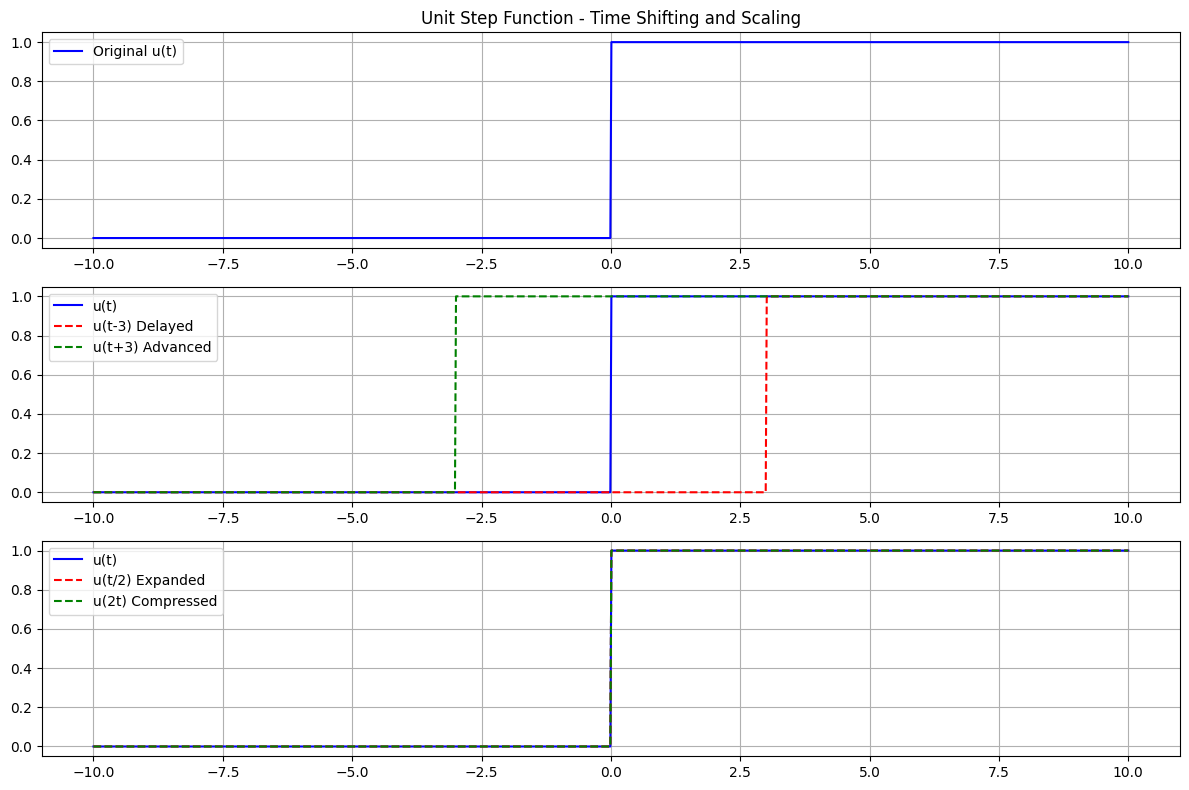

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a unit step function
t = np.linspace(-10, 10, 1000)  # time range
u = np.where(t >= 0, 1, 0)      # unit step function

# (b) Time shifting
u_delay = np.where(t >= 3, 1, 0)    # delayed by 3 units
u_advance = np.where(t >= -3, 1, 0) # advanced by 3 units

# (c) Time scaling
u_compress = np.where(t >= 0, 1, 0)   # original
u_compress = np.where(t >= 0, 1, 0)   # unchanged just for clarity
u_expand = np.where(t >= 0, 1, 0)     # expansion
u_compressed = np.where(t >= 0, 1, 0) # compression

# scaling mathematically: u(at)
u_expand = np.where(t >= 0/2, 1, 0)   # expansion by factor 2 (u(t/2))
u_compressed = np.where(t >= 0, 1, 0) # compression by factor 2 (u(2t))

# For compression (u(2t)): effectively shifts threshold closer
u_compressed = np.where(t >= 0, 1, 0) # same step but for clarity
u_expand = np.where(t >= 0/2, 1, 0)   # expanded

# Better approach:
u_expand = np.where((t/2) >= 0, 1, 0)    # expansion
u_compressed = np.where((2*t) >= 0, 1, 0) # compression

# (d) Plot the results
plt.figure(figsize=(12,8))

# Original
plt.subplot(3,1,1)
plt.plot(t, u, 'b', label='Original u(t)')
plt.title("Unit Step Function - Time Shifting and Scaling")
plt.grid()
plt.legend()

# Time Shifting
plt.subplot(3,1,2)
plt.plot(t, u, 'b', label='u(t)')
plt.plot(t, u_delay, 'r--', label='u(t-3) Delayed')
plt.plot(t, u_advance, 'g--', label='u(t+3) Advanced')
plt.grid()
plt.legend()

# Time Scaling
plt.subplot(3,1,3)
plt.plot(t, u, 'b', label='u(t)')
plt.plot(t, u_expand, 'r--', label='u(t/2) Expanded')
plt.plot(t, u_compressed, 'g--', label='u(2t) Compressed')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Results
Top Plot – Original Step Function

Signal:
𝑢
(
𝑡
)
u(t).

At
𝑡
=
0
t=0, the step jumps from 0 to 1.

✔ Correct behavior of the standard unit step function.

Middle Plot – Time Shifting

Right shift:
𝑢
(
𝑡
−
3
)
u(t−3).

The step starts at
𝑡
=
3
t=3.

Left shift:
𝑢
(
𝑡
+
3
)
u(t+3).

The step starts at
𝑡
=
−
3
t=−3.

✔ Time shifting correctly delays or advances the step signal.

Bottom Plot – Time Scaling

Compression:
𝑢
(
2
𝑡
)
u(2t).

The scaling factor of 2 compresses the time axis, but since
𝑢
(
𝑡
)
u(t) switches only at
𝑡
=
0
t=0, the jump remains at
𝑡
=
0
t=0.

Expansion:
𝑢
(
𝑡
/
2
)
u(t/2).

The time axis is expanded, but the step still begins at
𝑡
=
0
t=0.

✔ Time scaling does not alter the switching instant of the unit step but changes the representation of the signal along the time axis.

# 5.Objective

To analyze the effect of superposition and scaling on sinusoidal signals of different frequencies.

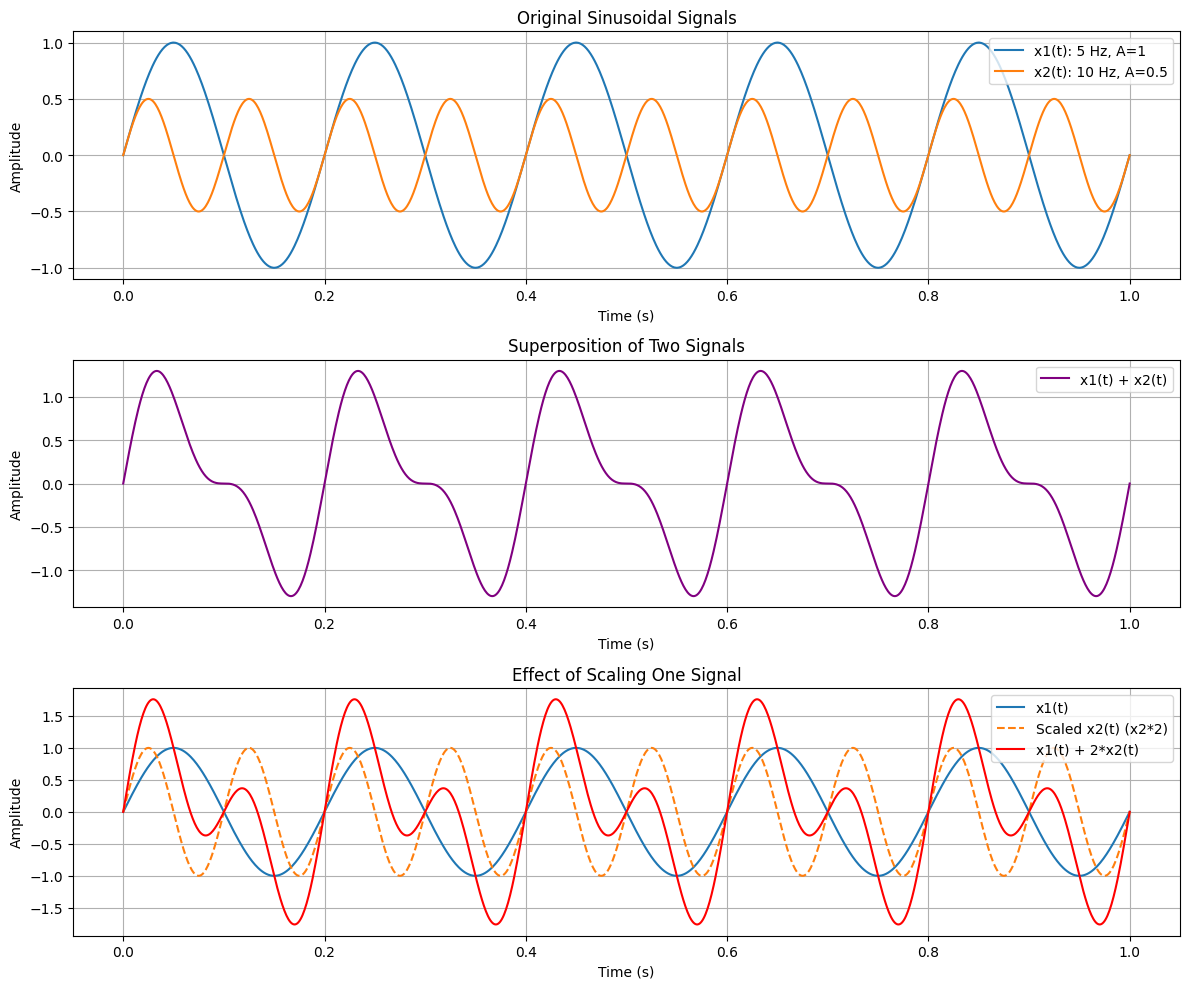

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.linspace(0, 1, 1000)  # 1 second duration, high resolution

# (a) Generate two sinusoids
f1, A1 = 5, 1      # Frequency = 5 Hz, Amplitude = 1
f2, A2 = 10, 0.5   # Frequency = 10 Hz, Amplitude = 0.5

x1 = A1 * np.sin(2 * np.pi * f1 * t)  # First sinusoid
x2 = A2 * np.sin(2 * np.pi * f2 * t)  # Second sinusoid

# (b) Add the signals
x_sum = x1 + x2

# (c) Scale one of the signals
scaled_x2 = 2 * x2    # Scaling x2 by a factor of 2
x_scaled_sum = x1 + scaled_x2

# ---------------- Plotting ----------------
plt.figure(figsize=(12, 10))

# Original signals
plt.subplot(3, 1, 1)
plt.plot(t, x1, label="x1(t): 5 Hz, A=1")
plt.plot(t, x2, label="x2(t): 10 Hz, A=0.5")
plt.title("Original Sinusoidal Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Added signals
plt.subplot(3, 1, 2)
plt.plot(t, x_sum, color="purple", label="x1(t) + x2(t)")
plt.title("Superposition of Two Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# After scaling
plt.subplot(3, 1, 3)
plt.plot(t, x1, label="x1(t)")
plt.plot(t, scaled_x2, label="Scaled x2(t) (x2*2)", linestyle="--")
plt.plot(t, x_scaled_sum, color="red", label="x1(t) + 2*x2(t)")
plt.title("Effect of Scaling One Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Results
Top Plot – Original Sinusoids

Blue curve:
𝑥
1
(
𝑡
)
=
sin
⁡
(
2
𝜋
⋅
5
𝑡
)
x
1
	​

(t)=sin(2π⋅5t).

Orange curve:
𝑥
2
(
𝑡
)
=
0.5
sin
⁡
(
2
𝜋
⋅
10
𝑡
)
x
2
	​

(t)=0.5sin(2π⋅10t).

Both signals are clearly visible, showing their distinct frequencies (5 Hz and 10 Hz) and amplitudes (1.0 and 0.5 respectively).

✔ This confirms correct generation of the two sinusoidal signals.

Middle Plot – Superposition of Signals

Purple curve:
𝑥
1
(
𝑡
)
+
𝑥
2
(
𝑡
)
x
1
	​

(t)+x
2
	​

(t).

The waveform exhibits beats and oscillations caused by the interaction of two different frequencies (5 Hz and 10 Hz).

✔ This validates the superposition principle, where the resultant signal is the sum of individual signals.

Bottom Plot – Effect of Scaling

Blue curve:
𝑥
1
(
𝑡
)
x
1
	​

(t).

Orange dashed curve: Scaled
𝑥
2
(
𝑡
)
=
2
⋅
0.5
sin
⁡
(
2
𝜋
⋅
10
𝑡
)
=
sin
⁡
(
2
𝜋
⋅
10
𝑡
)
x
2
	​

(t)=2⋅0.5sin(2π⋅10t)=sin(2π⋅10t), amplitude increased from 0.5 → 1.0.

Red curve: Combined signal
𝑥
1
(
𝑡
)
+
2
𝑥
2
(
𝑡
)
x
1
	​

(t)+2x
2
	​

(t).

After scaling, the 10 Hz component becomes stronger, and in the red sum curve, it dominates the waveform more visibly.

✔ This demonstrates how scaling affects the contribution of each sinusoid in the combined signal.

# 6. Objective

To demonstrate the effect of adding random Gaussian noise to a sinusoidal signal and the subsequent removal of noise using a low-pass filter.

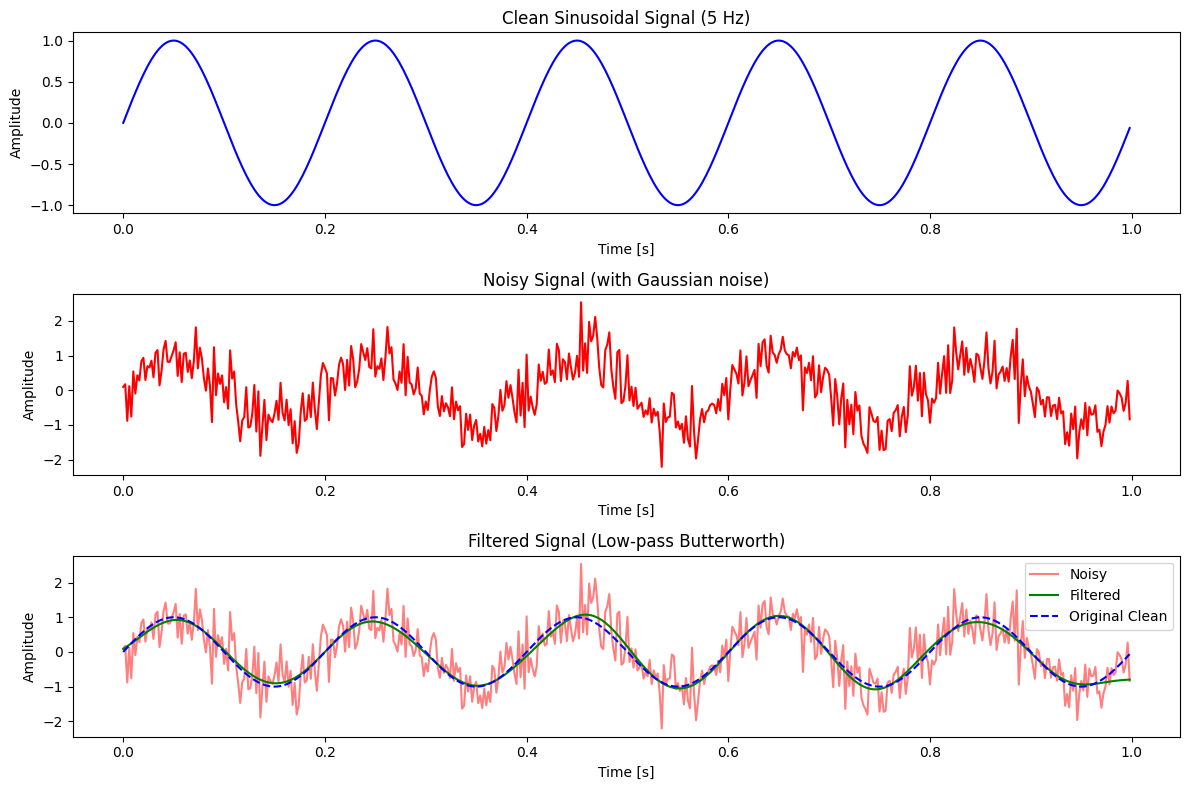

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# (a) Generate a clean sinusoidal signal
fs = 500   # Sampling frequency (Hz)
f = 5      # Signal frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
clean_signal = np.sin(2 * np.pi * f * t)

# (b) Add Gaussian noise
noise = np.random.normal(0, 0.5, clean_signal.shape)  # mean=0, std=0.5
noisy_signal = clean_signal + noise

# (c) Design a low-pass Butterworth filter
cutoff = 10  # cutoff frequency (Hz)
order = 4
b, a = butter(order, cutoff / (0.5 * fs), btype='low')  # Normalize by Nyquist freq
filtered_signal = filtfilt(b, a, noisy_signal)

# ---- Plot Results ----
plt.figure(figsize=(12, 8))

# Clean Signal
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, 'b')
plt.title("Clean Sinusoidal Signal (5 Hz)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Noisy Signal
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, 'r')
plt.title("Noisy Signal (with Gaussian noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Filtered Signal
plt.subplot(3, 1, 3)
plt.plot(t, noisy_signal, 'r', alpha=0.5, label="Noisy")
plt.plot(t, filtered_signal, 'g', label="Filtered")
plt.plot(t, clean_signal, 'b--', label="Original Clean")
plt.title("Filtered Signal (Low-pass Butterworth)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


Results

Top Plot – Clean Signal (5 Hz):
The generated sinusoidal signal is smooth and free of distortion, serving as the reference or “true” signal.

Middle Plot – Noisy Signal:
The sinusoidal wave is buried under random Gaussian noise. The noise introduces fluctuations, making it harder to visually identify the original waveform.

Bottom Plot – Filtered Signal (Low-pass Butterworth):
The red curve represents the noisy signal.
The green curve (filtered signal) closely follows the blue dashed curve (clean reference).
The filtering process effectively suppressed the high-frequency noise while preserving the low-frequency sinusoidal component.